In [1]:
import numpy as np
import json
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
from scipy import stats, io
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_permutation_test

BIDS_path= "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\"
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']


In [2]:
df_all = pd.read_csv("df_all.csv", index_col=0)
df_best_ECOG_CON = pd.read_csv("df_ECOG_CON.csv", index_col=0)
df_best_ECOG_IPS = pd.read_csv("df_ECOG_IPS.csv", index_col=0)
df_best_STN_CON = pd.read_csv("df_STN_CON.csv", index_col=0)
df_best_STN_IPS = pd.read_csv("df_STN_IPS.csv", index_col=0)

### beta peak

In [3]:
# mean of con. and ips. best ch. 
df_here_ECOG = df_best_ECOG_CON
df_here_ECOG["r2"] = np.mean(np.concatenate((np.arctanh(np.expand_dims(df_best_ECOG_CON["r2_con"], axis=1)), \
                np.expand_dims(df_best_ECOG_IPS["r2_ips"], axis=1)), axis=1), axis=1)
model = smf.ols("r2~b_peak", data=df_here_ECOG)
results = model.fit()
print(results.summary())

rho_ECOG = np.round(stats.spearmanr(df_here_ECOG["r2"], df_here_ECOG["b_peak"])[0], 2)
#p_val_ECOG = np.round(results.pvalues["b_peak"],3)
p_val_ECOG = np.round(stats.spearmanr(df_here_ECOG["r2"], df_here_ECOG["b_peak"])[1], 2)

df_here_STN = df_best_STN_CON
df_here_STN["r2"] = np.mean(np.concatenate((np.arctanh(np.expand_dims(df_best_STN_CON["r2_con"], axis=1)), \
                np.expand_dims(df_best_STN_IPS["r2_ips"], axis=1)), axis=1), axis=1)
model = smf.ols("r2~b_peak", data=df_here_STN)
results = model.fit()
print(results.summary())

rho_STN = np.round(stats.spearmanr(df_here_STN["r2"], df_here_STN["b_peak"])[0], 2)
#p_val_STN = np.round(results.pvalues["b_peak"],3)
p_val_STN = np.round(stats.spearmanr(df_here_STN["r2"], df_here_STN["b_peak"])[1], 2)

                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     9.168
Date:                Fri, 23 Oct 2020   Prob (F-statistic):            0.00904
Time:                        12:42:19   Log-Likelihood:                 9.4611
No. Observations:                  16   AIC:                            -14.92
Df Residuals:                      14   BIC:                            -13.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0949      0.109     -0.875      0.3

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


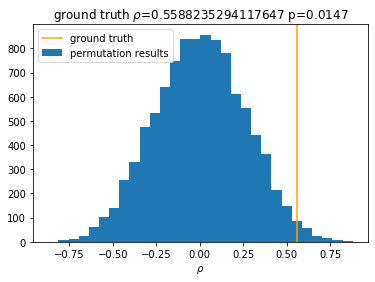

(0.5588235294117647, 0.0147)

In [4]:
icn_permutation_test.permutationTestSpearmansRho(df_here_ECOG["r2"], df_here_ECOG["b_peak"], True,r"$\rho$", 10000)

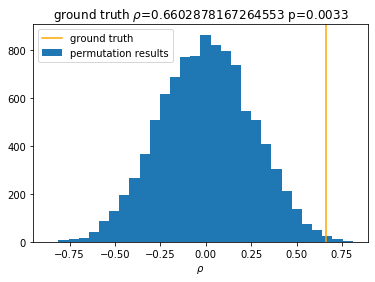

(0.6602878167264553, 0.0033)

In [5]:
icn_permutation_test.permutationTestSpearmansRho(df_here_STN["r2"], df_here_STN["b_peak"], True,r"$\rho$", 10000)

In [1]:
plt.figure(figsize=(6,4), dpi=200)
sns.regplot(x="b_peak", y="r2", data=df_here_ECOG, label="ECOG", color=(53/255,183/255,121/255))
sns.regplot(x="b_peak", y="r2", data=df_here_STN, label="STN", color=(49/255,104/255,142/255))
plt.legend()
plt.xlabel("Sum Beta Peak")
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of Con. and Ips. best performances\n"+
          "ECOG "+ r"$\rho$"+"="+str(rho_ECOG)+" p="+str(p_val_ECOG)+\
          "\nSTN "+ r"$\rho$"+"="+str(rho_STN)+" p="+str(p_val_STN)+\
          "\nSum of Beta Peaks No Movement periodic fit\n ")

NameError: name 'plt' is not defined

### UPDRS Upper Rigidity Correlation

In [29]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.array(per_)
df_comp_ECOG["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()
print(stats.spearmanr(df_comp_ECOG["r2"], df_comp_ECOG["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.6131617779732899, pvalue=0.04485069721774724)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     9.459
Date:                Thu, 22 Oct 2020   Prob (F-statistic):             0.0132
Time:                        10:59:24   Log-Likelihood:                 10.938
No. Observations:                  11   AIC:                            -17.88
Df Residuals:                       9   BIC:                            -17.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\ICN_admin\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [30]:
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
pred_var = "UPDRS_total"
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(np.concatenate((df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_contralateral"], 
                               df_here[df_here["sub"] == sub_]["UPDRS_rigidity_upper_extrimity_ipsilateral"])).mean()) 
    
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())



SpearmanrResult(correlation=-0.657241060772843, pvalue=0.027988158732147477)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     7.960
Date:                Thu, 22 Oct 2020   Prob (F-statistic):             0.0200
Time:                        10:59:31   Log-Likelihood:                 14.232
No. Observations:                  11   AIC:                            -24.46
Df Residuals:                       9   BIC:                            -23.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Text(0.5, 1.0, '\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n $R^2$: Mean of Con. and Ips. mean performances \nECOG: $\\rho$=-0.65 p=0.045 STN: $\\rho$=-0.66 p=0.028')

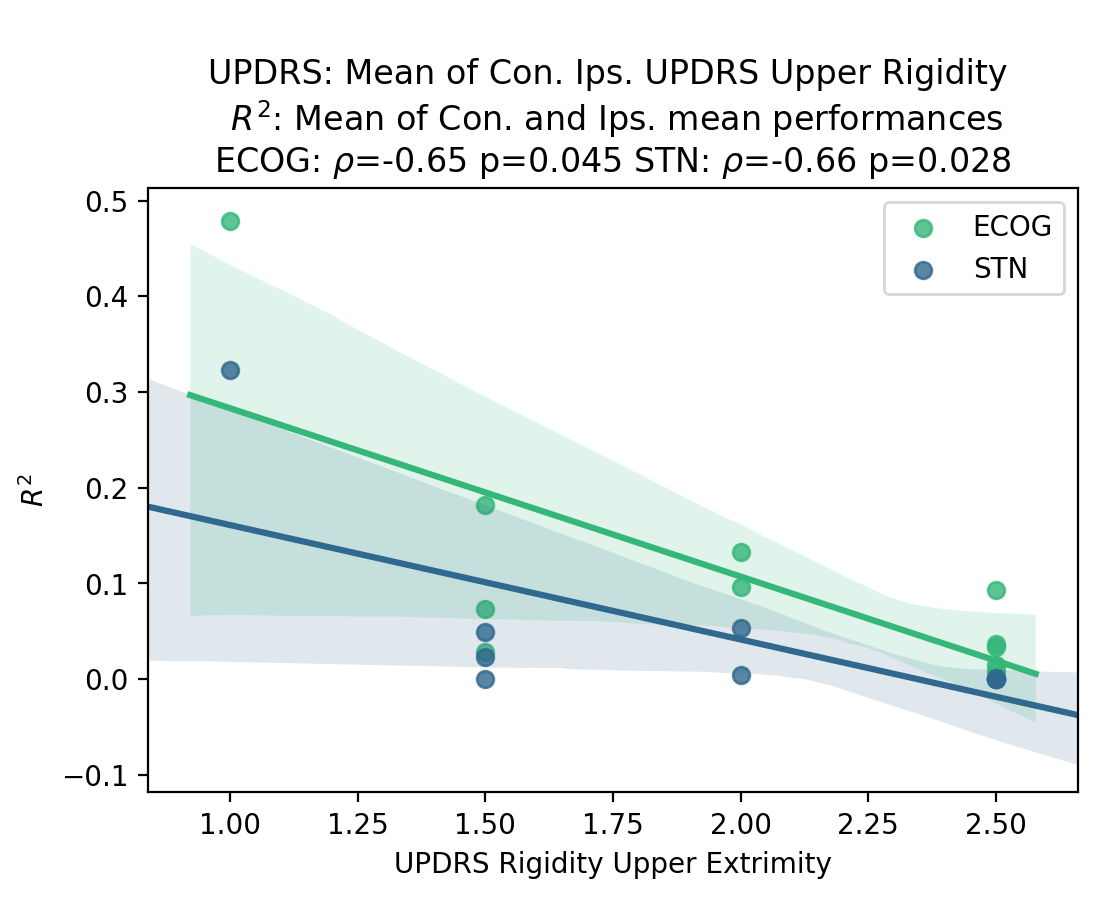

In [31]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color=(53/255,183/255,121/255), label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN,  color=(49/255,104/255,142/255), label="STN")
plt.legend()
plt.xlabel("UPDRS Rigidity Upper Extrimity")
plt.ylabel(r"$R^2$")
plt.title("\nUPDRS: Mean of Con. Ips. UPDRS Upper Rigidity \n "+\
          r"$R^2$"+": Mean of Con. and Ips. mean performances \n"+\
          "ECOG: "r"$\rho$"+"=-0.65 p=0.045"+" STN: "r"$\rho$"+"=-0.66 p=0.028")

### UPDRS total

In [32]:
df_here = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 
    
    
print(stats.spearmanr(per_, pred_))
df_comp_ECOG = pd.DataFrame()
df_comp_ECOG["r2"] = np.arctanh(np.array(per_))
df_comp_ECOG["pred"] = pred_
model = smf.ols("r2~pred", data=df_comp_ECOG)
results = model.fit()

print(results.summary())

SpearmanrResult(correlation=-0.5512542775696283, pvalue=0.07878928423361271)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     3.255
Date:                Thu, 22 Oct 2020   Prob (F-statistic):              0.105
Time:                        11:00:13   Log-Likelihood:                 7.7461
No. Observations:                  11   AIC:                            -11.49
Df Residuals:                       9   BIC:                            -10.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [33]:
df_here = df_all[df_all["loc"].str.contains("STN")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here[df_here["sub"] == sub_]["r2_con"], \
                               df_here[df_here["sub"] == sub_]["r2_ips"])).mean())
   # pred_.append(df_here[df_here["sub"] == sub_][pred_var].mean())
    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 
    
df_comp_STN = pd.DataFrame()
df_comp_STN["r2"] = np.array(per_)
df_comp_STN["pred"] = pred_

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()
print(stats.spearmanr(df_comp_STN["r2"], df_comp_STN["pred"]))
print(results.summary())

SpearmanrResult(correlation=-0.5525691640126262, pvalue=0.07793082878582444)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.228
Date:                Thu, 22 Oct 2020   Prob (F-statistic):              0.170
Time:                        11:00:33   Log-Likelihood:                 11.964
No. Observations:                  11   AIC:                            -19.93
Df Residuals:                       9   BIC:                            -19.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

Text(0.5, 1.0, '$R^2$: Mean of Con. and Ips. mean performances \nECOG: $\\rho$=-0.55 p=0.078 STN: $\\rho$=-0.55 p=0.078')

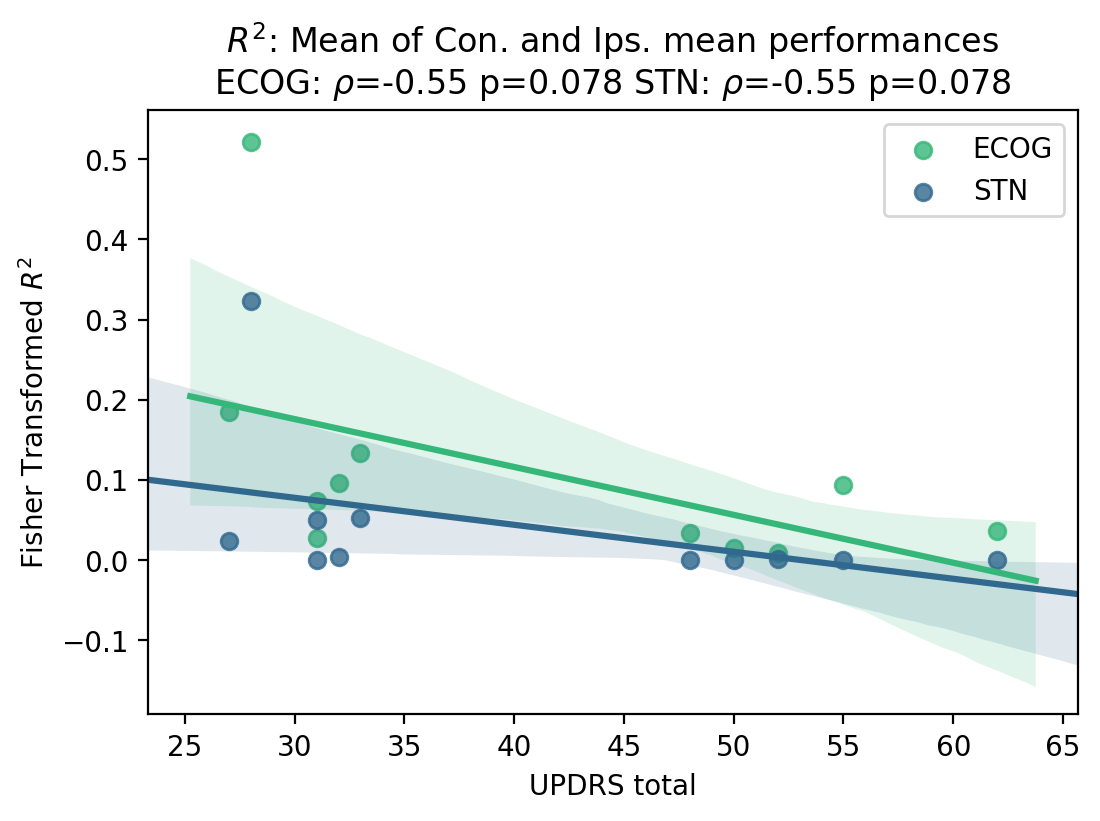

In [34]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="pred", y="r2", data=df_comp_ECOG, color=(53/255,183/255,121/255), label="ECOG")
sns.regplot(x="pred", y="r2", data=df_comp_STN,  color=(49/255,104/255,142/255), label="STN")
plt.legend()
plt.xlabel("UPDRS total")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title(r"$R^2$"+": Mean of Con. and Ips. mean performances \n"+\
          "ECOG: "r"$\rho$"+"=-0.55 p=0.078"+" STN: "r"$\rho$"+"=-0.55 p=0.078")

### combine ECOG and STN 

In [13]:
df_here_STN = df_all[df_all["loc"].str.contains("STN")]
df_here_ECOG = df_all[df_all["loc"].str.contains("ECOG")]
per_ = []
pred_ = []
for sub in subjects:
    sub_ = int(sub)
    per_.append(np.concatenate((df_here_ECOG[df_here_ECOG["sub"] == sub_]["r2_con"], \
                               df_here_ECOG[df_here_ECOG["sub"] == sub_]["r2_ips"], 
                         df_here_STN[df_here_STN["sub"] == sub_]["r2_con"], \
                               df_here_STN[df_here_STN["sub"] == sub_]["r2_ips"])).mean())

    pred_.append(df_here[df_here["sub"] == sub_]["UPDRS_total"].iloc[0]) 


df_comp = pd.DataFrame()
df_comp["r2"] = np.array(per_)
df_comp["pred"] = pred_
print(stats.spearmanr(df_comp["r2"], df_comp["pred"]))

model = smf.ols("r2~pred", data=df_comp_STN)
results = model.fit()

print(results.summary())

SpearmanrResult(correlation=-0.6104799437547951, pvalue=0.046060398811002226)
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2.077
Date:                Thu, 22 Oct 2020   Prob (F-statistic):              0.183
Time:                        10:16:18   Log-Likelihood:                 10.332
No. Observations:                  11   AIC:                            -16.66
Df Residuals:                       9   BIC:                            -15.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Text(0.5, 1.0, '$R^2$: Mean of Con. and Ips. mean performances \nECOG and STN combined: $\\rho$=-0.61 p=0.046')

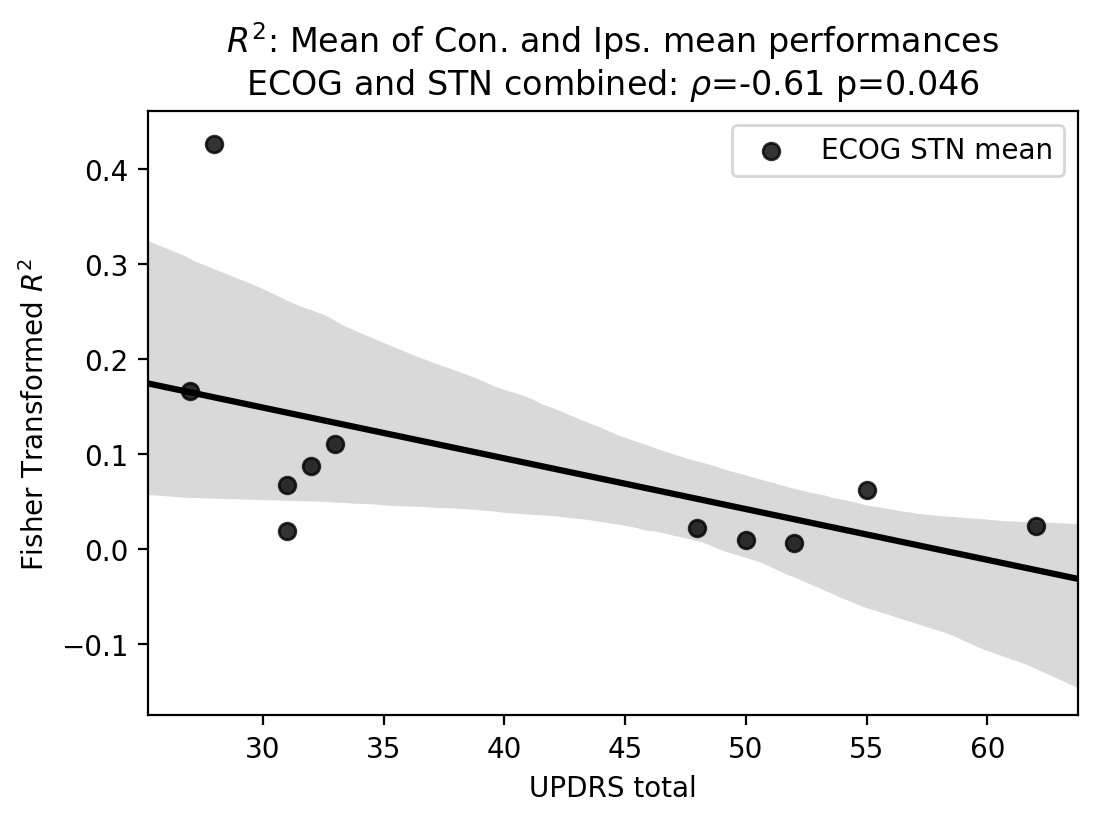

In [37]:
plt.figure(figsize=(6,4), dpi=200)

sns.regplot(x="pred", y="r2", data=df_comp, color="black", label="ECOG STN mean")
plt.legend()
plt.xlabel("UPDRS total")
plt.ylabel("Fisher Transformed " + r"$R^2$")
plt.title(r"$R^2$"+": Mean of Con. and Ips. mean performances \n"+\
          "ECOG and STN combined: "r"$\rho$"+"=-0.61 p=0.046")

### test non parametric permutation test

In [1]:
import numpy as np
from sklearn import datasets
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import copy

In [ ]:
### comparison between two distributions... 
### here: 

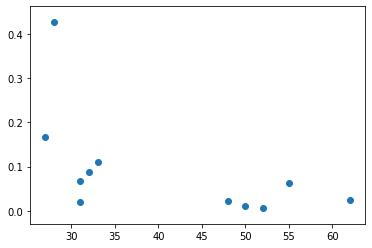

In [19]:
plt.scatter(df_comp["pred"], df_comp["r2"])

In [20]:
stats.ranksums(df_comp["r2"], df_comp["pred"])

RanksumsResult(statistic=-3.9727331518303837, pvalue=7.105263288600155e-05)

In [15]:
gT = np.abs(np.average(df_comp["r2"]) - np.average(df_comp["pred"]))

In [16]:
gT

40.726888895465656

In [ ]:
pV = list(df_comp["r2"]) + list(df_comp["pred"])

In [ ]:
#Copy pooled distribution:
pS = copy.copy(pV)
#Initialize permutation:
pD = []
#Define p (number of permutations):
p=1000
# Permutation loop:
for i in range(0,p):
  # Shuffle the data:
    random.shuffle(pS)
    # Compute permuted absolute difference of your two sampled distributions and store it in pD:
    pD.append(np.abs(np.average(pS[0:int(len(pS)/2)]) - np.average(pS[int(len(pS)/2):])))